In [160]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
mnist = tf.contrib.learn.datasets.load_dataset("mnist")

from functools import partial

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [179]:
batch_size = 10

inputs = tf.placeholder(shape=[batch_size, 784], dtype=tf.float32)
x = tf.reshape(inputs, [batch_size, 28, 28])
x = tf.cast(x, tf.complex64)
x.shape, x.dtype

(TensorShape([Dimension(10), Dimension(28), Dimension(28)]), tf.complex64)

In [180]:
def complex_random(fn, shape):
    real = fn(dtype=tf.float32, shape=shape)
    imag = fn(dtype=tf.float32, shape=shape)
    return tf.complex(real, imag)

In [181]:
def mri(x, n_samples=10):
    """
    Want to have a model of the
    forward dynamics of the mri scanning process.
    
    y = mask(fft(x)) + noise
    """
    # TODO want to be able to get the gradient of y w.r.t x!
    
    # but in reality these samples are recieved sequentially?
    # by sampling rows/spirals/columns...?
    
    ### the measurements made
    # (for greater fficiency, can this be done stepwise?)
    y = tf.fft2d(x)
    # https://en.wikipedia.org/wiki/Fourier_transform
    # TODO. why is y the same shape as x!? still 28 x 28!?
    
    ### subsample
    sub_sampler = complex_random(partial(tf.random_uniform, minval=0, maxval=1), y.shape)
    y *= sub_sampler
    
    # y = tf.matmul(sub_sampler, tf.fft2d(x))
    
    ### add noise
    y += complex_random(tf.random_normal, y.shape)
    return y

In [192]:
dydx = tf.gradients(y, 
                    inputs, 
                    grad_ys=complex_random(tf.ones, y.shape))

In [182]:
y = mri(x)
z = tf.ifft2d(y)

In [183]:
with tf.Session() as sess:
    Y, Z = sess.run([y, z], feed_dict={inputs: mnist.train.images[0:batch_size, ...]})

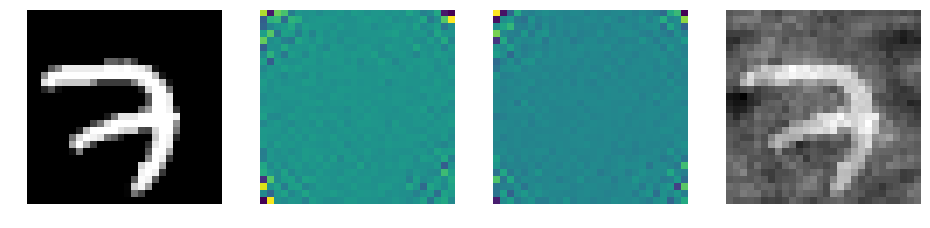

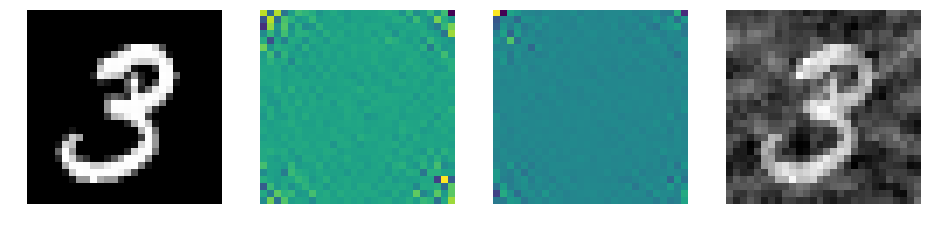

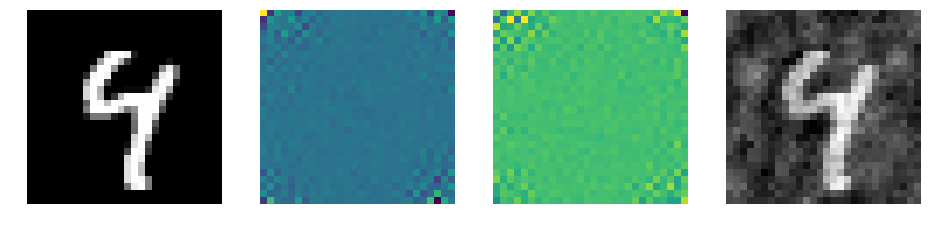

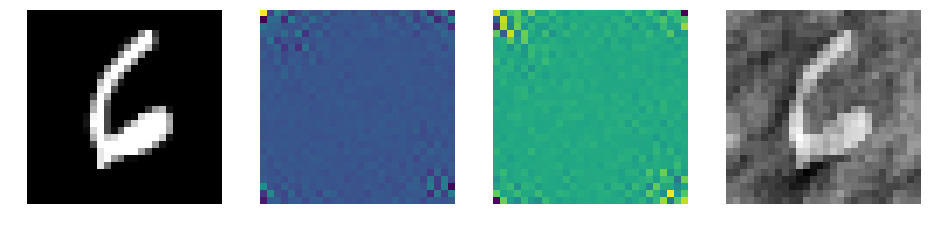

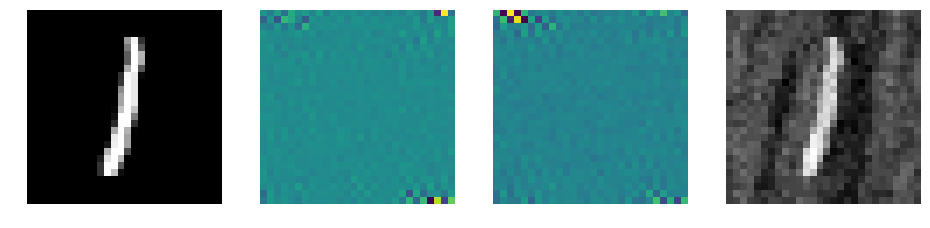

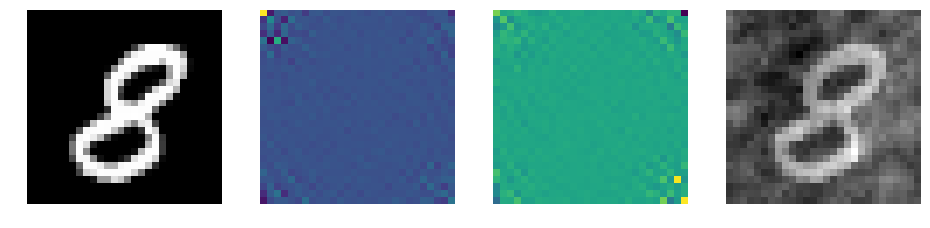

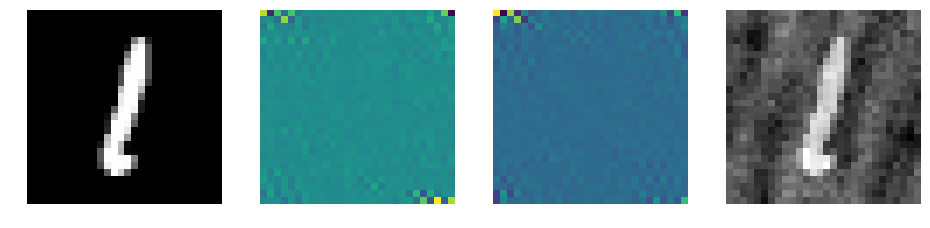

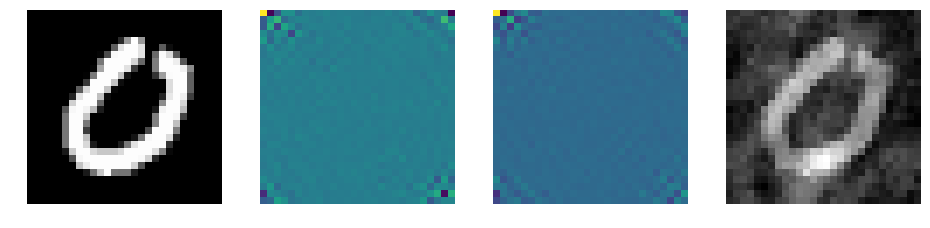

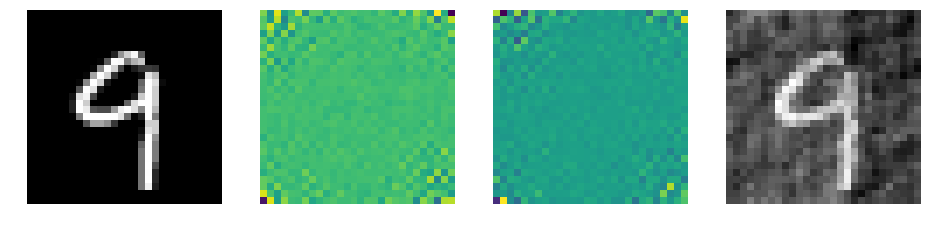

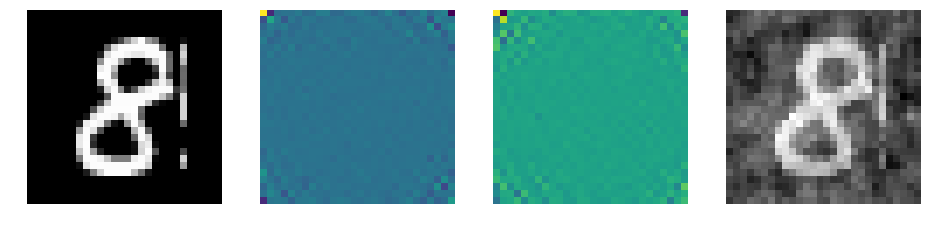

In [187]:
for i in range(batch_size):
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 4, 1)
    plt.imshow(mnist.train.images[i, ...].reshape((28, 28)), cmap='gray', interpolation='nearest')
    plt.axis('off')
    plt.subplot(1, 4, 2)
    plt.imshow(np.real(Y[i]).reshape((28, 28)))
    plt.axis('off')
    plt.subplot(1, 4, 3)
    plt.imshow(np.imag(Y[i]).reshape((28, 28)))
    plt.axis('off')
    plt.subplot(1, 4, 4)
    plt.imshow(np.real(Z[i]).reshape((28, 28)), cmap='gray', interpolation='nearest')
    plt.axis('off')